## Programmation Quantique (suite)

### Nicolas Ollinger et Ioan Todinca
<img style="width:15%; height: auto;" src="img/lifo.png">

#### M2 info, S9 2024/2025

## Circuits quantiques ?

Les ordinateurs quantiques d'aujourd'hui (ou plutôt de demain ?) s'utilisent comme des _coprocesseurs_ : on y fait subir une <b class="cool">transformation unitaire</b> à un <b class="cool">registre de qubits</b> initialement tous à zéro avant d'effectuer des <b class="cool">mesures</b> sur son état.

Les <b class="cool">transformations unitaires</b> sont codées sous forme de circuits et la programmation quantique ressemble à de la <b class="cool">programmation assembleur</b>.

La programmation quantique propose une <b class="cool">nouvelle forme de parallélisme</b>.


### Hello qiskit

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit_aer import UnitarySimulator
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from math import sqrt
import numpy as np

# Un simulateur de circuit complet
sim = BasicProvider().get_backend('basic_simulator')

# Un simulateur calculant la matrice de transformation
usim = UnitarySimulator()

# Afficher un circuit
def draw_circ(circ): display(circ.draw(output='mpl'))
    
# Calculer la matrice d'un circuit
def mat_circ(circ): return usim.run(circ).result().get_unitary()

def show(circ):
    draw_circ(circ)
    display(mat_circ(circ).draw('latex'))

# Circuits quantiques

### Circuits quantiques

Un circuit quantique est composé d'un nombre constant de **fils** qui représentent des états quantiques d'un système discret fini. Les **fils** sont les **qubits**.

Des **portes quantiques** permettent d'effectuer des opérations sur ces états jusqu'à obtenir un état final.

Seules des **mesures** de ces états permettent d'obtenir une information (partielle) en sortie.

Les **qubits** sont tous initialisés à la valeur $\left|0\right>$.

### Représentations et calculs

Pour raisonner sur ces objets circuits et les **transformations unitaires** qu'ils réalisent, plusieurs outils sont à notre disposition :
 - la représentation matricielle des circuits (de dimension $2^n$ pour $n$ qubits !) ;
 - le calcul avec la notation de Dirac $\left<\phi\middle|\psi\right>$ ;
 - les outils graphiques du ZX-calcul !

<div style="text-align:center; width: 100%; height: 70%"><img style="margin: auto; width: auto; height: 100%;" src="img/qpic.png"></div>

### Un qubit

Un registre de <b class="cool">mémoire quantique</b> est un <b class="cool">système quantique discret fini</b> constitué de <b class="cool">qubits</b>.

Un <b class="cool">bit quantique</b> est une superposition de $0$ et de $1$ :
$$
\alpha \left|0\right> + \beta \left|1\right> \quad\mbox{avec}\quad \alpha, \beta \in \mathbb{C}
\quad\mbox{tels que}\quad |\alpha|^2+|\beta|^2 = 1
$$

Par exemple $\left|0\right>$ ou encore $\frac{1}{\sqrt{2}}\left(\left|0\right>+\left|1\right>\right)$

### Des qubits

Un registre de <b class="cool">$n$ qubits</b> est une superposition de chacun des vecteurs de bits possibles, chacun muni d'une amplitude.

$$
\left|\varphi\right> = \sum_{x\in\{0,1\}^n} \alpha_x\left|x\right> \quad\mbox{tels que}\quad \sqrt{\sum_{x\in\{0,1\}^n}  |\alpha_x|^2} = 1
$$

Par exemple $\frac12\left|1000\right>+\frac12\left|0100\right>+\frac12\left|0010\right>+\frac12\left|0001\right>$

### Produit tensoriel

La <b class="cool">composition</b> de deux registres quantiques s'obtient par l'opérateur bilinéaire de produit tensoriel $\otimes$ qui satisfait $\left|x\right> \otimes \left|y\right> = \left|xy\right>$.

$$
\left|1\right> \otimes \frac{1}{\sqrt{2}}\left(\left|0\right>+\left|1\right>\right) =
\frac{1}{\sqrt{2}}\left(\left|10\right>+\left|11\right>\right)
$$

Contrairement au cas classique, tout registre n'est pas décomposable en sous-registres ! 

Exemple d'état <b class="cool">intriqué</b> : $\frac{1}{\sqrt{2}}\left(\left|00\right>+\left|11\right>\right)$.

## Mesure quantique (observation)

<img style="width=100%; height=auto; margin: auto" src="img/mesure.png" />

## Mesure quantique d'un qubit particulier

Partant d'un état $\left|\varphi\right> = \sum_x \alpha_x\left|x\right>$, si on mesure le qubit numéro $i$, on observe la valeur $r$ avec la probabilité $p_r$ et le système change d'état :

$$
\sum_{x\in\left\{0,1\right\}^n} \alpha_x\left|x\right> \underset{\phantom{blop}p_r\phantom{blop}}{\longrightarrow}
\frac{1}{\sqrt{p_r}} \sum_{x\in\left\{0,1\right\}^n | x_i = r} \alpha_x\left|x\right>
$$
 
$$
\mbox{avec}\quad p_r = \sum_{x\in\left\{0,1\right\}^n | x_i = r}|\alpha_x|^2
$$

## Évolution unitaire

En l'absence de mesure, lorsqu'il est isolé, l'état d'un système quantique évolue de manière <b class="cool">unitaire</b>.

$$
U : \mathbb{C}^{\{0,1\}^n} \rightarrow \mathbb{C}^{\{0,1\}^n}
$$

1. $U$ est linéaire : $$
U\left(\alpha\left|\varphi\right>+\beta\left|\psi\right>\right) = \alpha U\left|\varphi\right>+\beta U\left|\psi\right>\quad;
$$
2. $U$ préserve la norme : $\left\| U\left|\varphi\right> \right\| = \left\| \left|\varphi\right> \right\|$.

## Porte quantique

Un circuit quantique code une <b class="cool">transformation unitaire</b> obtenue par composition de <b class="cool">portes quantiques</b> elles aussi unitaires, donc réversibles, avec autant de qubits en entrée qu'en sortie.
- composition séquentielle : produit de matrices ;
- composition parallèle : produit tensoriel.

## Portes sur 1 qubit

$$
\begin{array}{clclcl}
X :& \left|0\right> \mapsto \left|1\right> & H :& \left|0\right> \mapsto \frac{\left|0\right>+\left|1\right>}{\sqrt2}  & R_\theta :& \left|0\right> \mapsto \left|0\right>\\
   & \left|1\right> \mapsto \left|0\right> &    & \left|1\right> \mapsto \frac{\left|0\right>-\left|1\right>}{\sqrt2} &  & \left|1\right> \mapsto e^{i\theta}\left|1\right> \\
\end{array}
$$

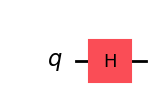

<IPython.core.display.Latex object>

In [4]:
from math import pi
circuit = QuantumCircuit(1)
# remplacer ici le x par h ou t (=r(pi/4)) ou sx (sqrt(x))
circuit.h(0)
show(circuit)

## Portes contrôlées

$$
\begin{array}{cl}
CX :& \left|00\right> \mapsto \left|00\right> \\
   & \left|01\right> \mapsto \left|01\right> \\
   & \left|10\right> \mapsto \left|11\right> \\
   & \left|11\right> \mapsto \left|10\right> \\
\end{array}
$$

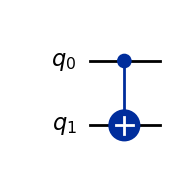

<IPython.core.display.Latex object>

In [18]:
circuit = QuantumCircuit(2)
circuit.cx(0,1)
show(circuit)

# Échauffement

## Que calcule ce circuit ?

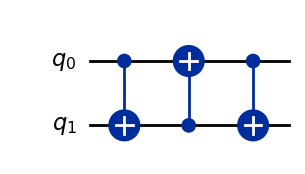

In [9]:
circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.cx(1,0)
circuit.cx(0,1)
draw_circ(circuit)

## Routage

Le processeur Quito peut effectuer des portes sur 1 qubit et des portes CX sur 2 qubits. Cette famille de portes est universelle.

<div style="width:100%">
<img style="display:inline; width:45%; height: auto;" src="img/quito2.png">
<img style="display:inline; width:45%; height: auto;" src="img/quito3.png">
</div>

Comment modifier un circuit complexe qui a besoin d'effectuer un CX entre les qubits 0 et 4 ? Quel en est le coût ?


# Porte de Hadamard

## Porte de Hadamard

La porte de Hadamard (H), sur 1 qubit, est une porte de changement de base.

$$
\begin{array}{clllll}
H :& \left|0\right> &\mapsto &\left|+\right> & = &\frac{\left|0\right>+\left|1\right>}{\sqrt2} \\
   & \left|1\right> &\mapsto &\left|-\right> & = &\frac{\left|0\right>-\left|1\right>}{\sqrt2}  \\
\end{array}
$$

En théorie, il suffit d'ajouter cette porte à la porte de Toffoli pour simuler polynomialement toute transformation unitaire (donc tout circuit quantique).

_En pratique ce n'est pas très efficace, on procède autrement._

## Exercice

Étudier ce circuit sur l'entrée $\left|00\right>$.

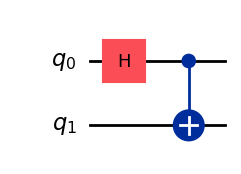

In [17]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
draw_circ(circuit)

## Propriétés

$$
\begin{array}{rl}
H \cdot H &= \text{Id}\\
H : \quad\left|x\right> &\mapsto \frac1{\sqrt 2}\sum_{y\in\{0,1\}} (-1)^{xy} \left|y\right>\\
H^{\otimes n} : \quad\left|x\right> &\mapsto \frac1{\sqrt {2^n}}\sum_{y\in\{0,1\}^n} (-1)^{x\bullet y} \left|y\right> \qquad\text{avec}\; x\bullet y = \bigoplus_i x_i y_i
\end{array}
$$

## Exercice

1. Calculer $H^{\otimes n} \left( \left|0\right>^{\otimes n}\right)$

2. Étudier ce circuit

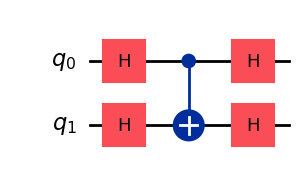

In [11]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.cx(0,1)
circuit.h(0)
circuit.h(1)
draw_circ(circuit)

## Vérification assistée par ordinateur

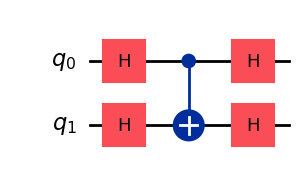

<IPython.core.display.Latex object>

In [12]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.cx(0,1)
circuit.h(0)
circuit.h(1)
show(circuit)

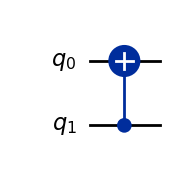

<IPython.core.display.Latex object>

In [13]:
circuit = QuantumCircuit(2)
circuit.cx(1,0)
show(circuit)

## Oracle

Pour toute fonction $f : \{0,1\}^n\rightarrow \{0,1\}$, nous avons vu qu'il existe un circuit quantique à $n+1$ qubits utiles (+ des qubits auxiliares) qui sur l'entrée $\left|x\right>\otimes\left|y\right>$ calcule $\left|x\right>\otimes\left|y \oplus f(x)\right>$.

Montrer qu'en ajoutant une porte $X$ et une porte $H$ de part et d'autre du circuit sur le fil de $\left|y\right>$, on obtient un circuit qui sur l'entrée $\left|x\right>$ calcule $(-1)^{f(x)} \left|x\right>$ à l'aide d'un qubit auxiliaire à $\left|0\right>$.


# Algorithme de Bernstein-Vazirani 

## Faire mieux en quantique ?

Les <b class="cool">algorithmes quantiques</b> dépassent les algorithmes classiques non pas sur ce qu'ils peuvent calculer mais par leur capacité à effectuer certains calculs asymptotiquement plus vite que les meilleurs algorithmes classiques connus :
- factorisation d'entiers (Shor) ;
- recherche d'un élément dans une liste non triée (Grover) ;
- ...

Regardons un exemple simple ensemble.

## Bernstein-Vazirani

Cet algorithme est de type <b class="cool">boîte noire</b>.

On suppose disposer d'un circuit classique qui, sur l'entrée $x \in \{0,1\}^{n}$, calcule la valeur $f(x) = x\odot s$ où $s$ est un vecteur caché de $n$ bits et $x\odot s = x_1 s_1 \oplus x_2 s_2 \oplus \cdots \oplus x_n s_n$.

L'objectif est de retrouver $s$ en le moins d'appels possible à $f$.

Un rapide raisonnement de théorie de l'information montre qu'un algorithme classique a besoin d'appeler $f$ au moins $n$ fois pour retrouver $s$ (et y arrive toujours).

## Bernstein-Vazirani (suite)

L'algorithme quantique proposé par Bernstein et Vazirani retrouve $s$ en un unique appel à $f$ !

On suppose disposer d'un circuit quantique qui, sur l'entrée $(x\otimes y)\in \{\left|0\right>,\left|1\right>\}^{n+1}$, calcule la valeur $x \otimes (y \oplus x\odot s)$.

Construisons un circuit qui illustre cet algorithme !

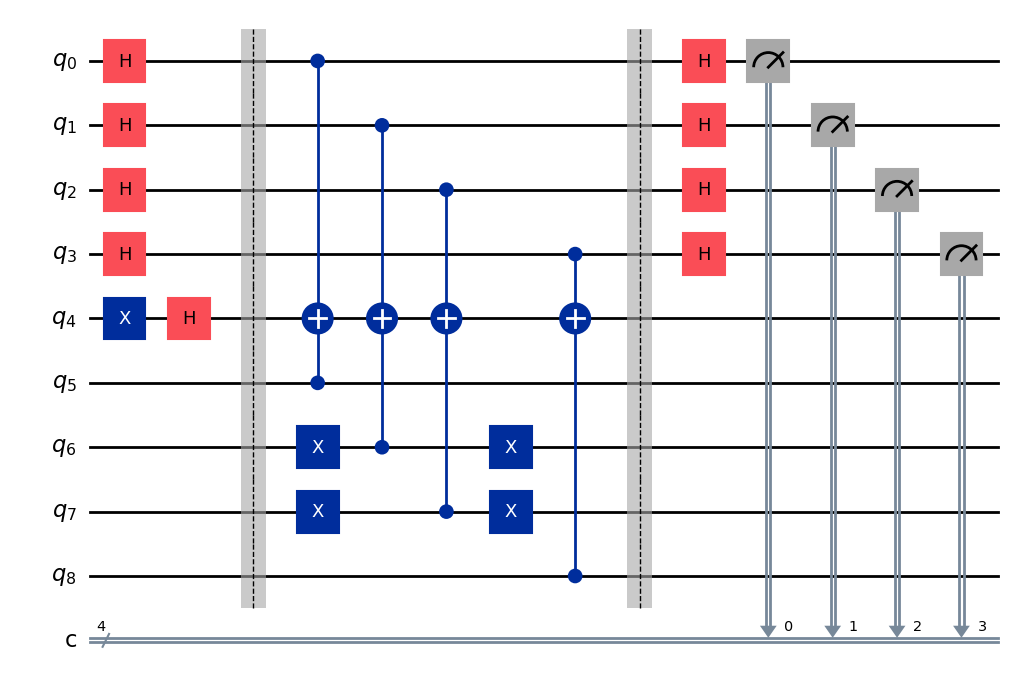

{'0110': 1}


In [2]:
s = '0110'
k = len(s)

circuit = QuantumCircuit(2*k+1,k)
 
# superposition
circuit.x(k)
for i in range(k+1):
    circuit.h(i)
circuit.barrier()
# calcul parallèle
for i in range(k):
    if s[i] == '1':
        circuit.x(k+1+i)

for i in range(k):
    circuit.ccx(i,k+1+i,k)

for i in range(k):
    if s[i] == '1':
        circuit.x(k+1+i)
circuit.barrier()
# transformation quantique
for i in range(k):
    circuit.h(i)
# mesure
circuit.measure(list(range(k)), list(range(k)))

display(circuit.draw(output='mpl',scale=1))
res = sim.run(circuit, shots=1).result()
print(res.get_counts(circuit))


## Exécuter à distance

### Exécuter le code sur un processeur quantique

Quelle différence entre notre simulateur et la vraie vie ?

Modifions l'exemple en un circuit équivalent pour le faire tenir sur moins de bits et le rendre un peu plus résistant au bruit.

Observons le résultat obtenu et le circuit exécuté.

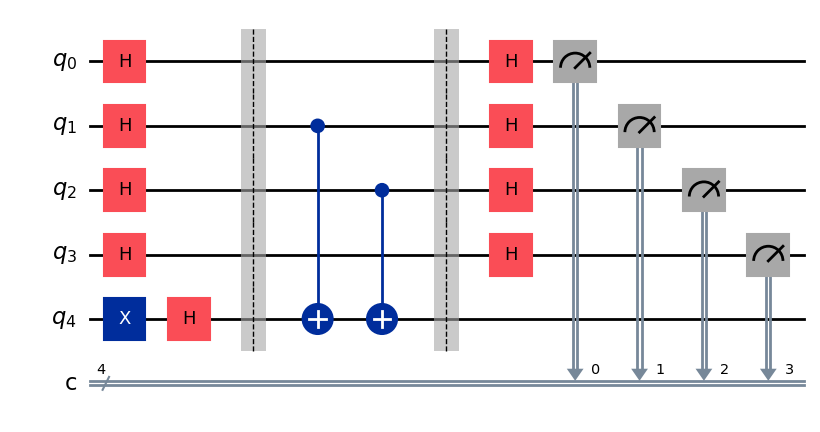

{'0110': 1}


In [3]:
s = '0110'
k = len(s)

circuit = QuantumCircuit(k+1,k)

circuit.x(k)
for i in range(k+1):
    circuit.h(i)
circuit.barrier()

for i in range(k):
    if s[i] == '1':
        circuit.cx(i,k)
circuit.barrier()

for i in range(k):
    circuit.h(i)
    
circuit.measure(list(range(k)), list(range(k)))

display(circuit.draw(output='mpl',scale=1))
res = sim.run(circuit, shots=1).result()
print(res.get_counts(circuit))


In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=5)

# Get the least busy real quantum system
print(backend, backend.status().pending_jobs)

<IBMBackend('ibm_sherbrooke')> 20


<img style="width:100%; height: auto;" src="img/sherbrooke1.png">

<img style="width:100%; height: auto;" src="img/sherbrooke2.png">

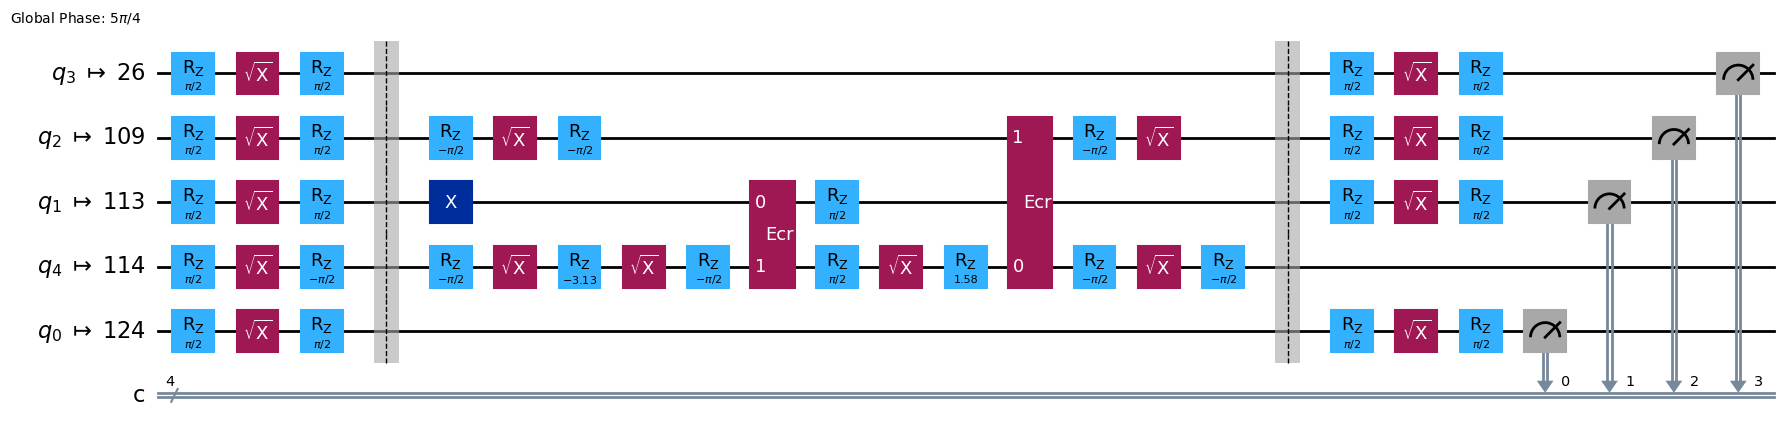

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(circuit)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [44]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()

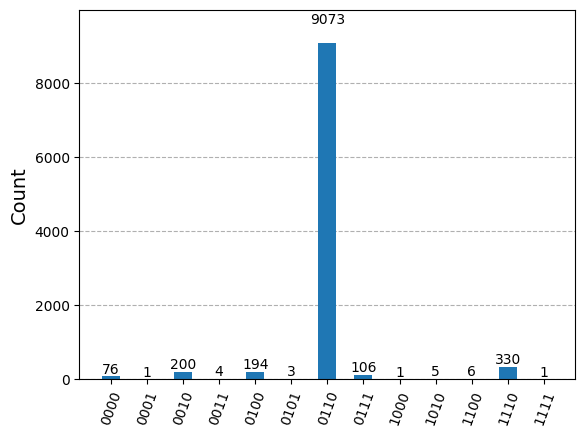

In [45]:
plot_histogram(result[0].data.c.get_counts())

# Démonstration

## par le calcul et combinatoirement